# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.00017, E_test is 0.012949999999999871
Average number of iterations is 27.513.


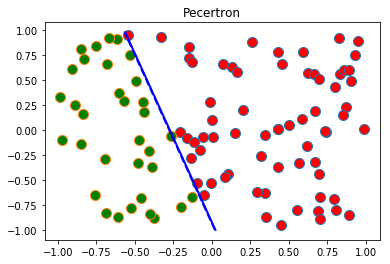

In [5]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0
sum_Iter = 0
def getPerceptron(X, y, w):
    X = np.vstack((np.ones((1, X.shape[1])), X))
    y2 = np.sign(np.matmul(w.T, X))
    return np.sum(y2 != y) / X.shape[1]

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g, iters = perceptron(X_train, Y_train)

    sum_E_train = sum_E_train + getPerceptron(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getPerceptron(X_test, Y_test, w_g)
    sum_Iter = sum_Iter + iters 

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
avgIter = sum_Iter / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_test, Y_test, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.23495000000000013, E_test is 0.2400599999999999
Average number of iterations is 1001.0.


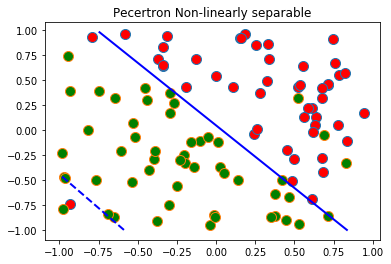

In [6]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0
sum_Iter = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g, iters = perceptron(X_train, Y_train)

    sum_E_train = sum_E_train + getPerceptron(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getPerceptron(X_test, Y_test, w_g)
    sum_Iter = sum_Iter + iters 

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
avgIter = sum_Iter / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_test, Y_test, w_f, w_g, 'Pecertron Non-linearly separable')

### Part3: Linear Regression

E_train is 0.03860999999999997, E_test is 0.048820000000000044


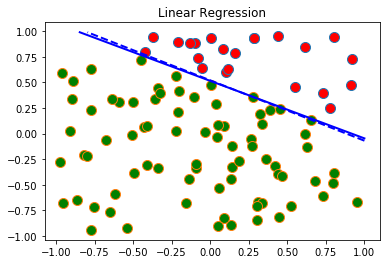

In [8]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0
def getLinear(X, y, w):
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    return np.sum(y != np.sign(np.matmul(X2.T, w).T)) / X.shape[1]

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g = linear_regression(X_train, Y_train)

    sum_E_train = sum_E_train + getLinear(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getLinear(X_test, Y_test, w_g)

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_test, Y_test, w_f, w_g, 'Linear Regression')

## Part4: Linear Regression: noisy

E_train is 0.13470000000000024, E_test is 0.1517999999999996


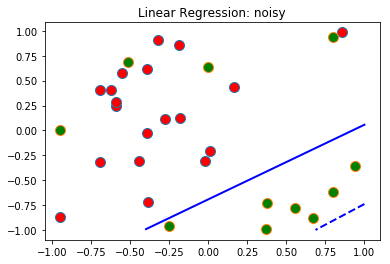

In [9]:
nRep = 1000 # number of replicates
nTrain = 70 # number of training data
nTest = 30
sum_E_train = 0
sum_E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g = linear_regression(X_train, Y_train)

    sum_E_train = sum_E_train + getLinear(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getLinear(X_test, Y_test, w_g)

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_test, Y_test, w_f, w_g, 'Linear Regression: noisy')

## Part5: Linear Regression: poly_fit

In [31]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
# print(y.shape, y_test.shape)
E_train = getLinear(X, y, w)
E_test = getLinear(X_test, y_test, w)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.concatenate((X, X * X, X[0:1,:] * X[1:,:] ), axis = 0)  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.concatenate((X_test, X_test * X_test, X_test[0:1,:] * X_test[1:,:]), axis = 0)  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
E_train = getLinear(X_t, y, w)
E_test = getLinear(X_test_t, y_test, w)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0074000000000000055, E_test is 0.01880000000000001


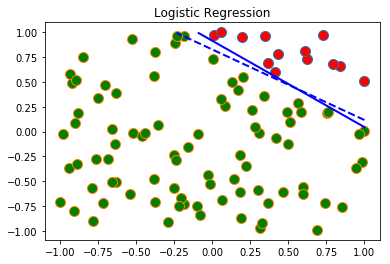

In [32]:
from logistic import logistic

nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0

def getLogistic(X, y, w):
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    y = np.intc(y == 1) 
    tmp = np.intc((1 / (1 + np.exp(-np.matmul(X2.T, w).T))) >= 0.5)
    return np.sum(y != tmp) / X.shape[1]


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g = logistic(X_train, Y_train)

    sum_E_train = sum_E_train + getLogistic(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getLogistic(X_test, Y_test, w_g)

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_test, Y_test, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.12399999999999999, E_test is 0.13503700000000005


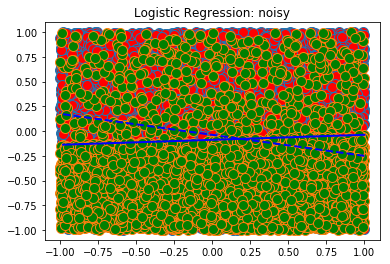

In [34]:
# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
sum_E_train = 0
sum_E_test = 0
sum_Iter = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g = logistic(X_train, Y_train)

    sum_E_train = sum_E_train + getLogistic(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getLogistic(X_test, Y_test, w_g)

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_test, Y_test, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.010559999999999906
Average number of support vectors is 2.038.


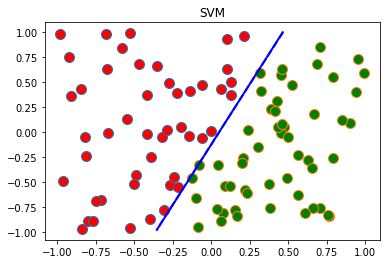

In [57]:
from svm import svm

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0
sum_Num = 0
def getSVM(X, y, w):
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    return np.sum(y != np.sign(np.matmul(X2.T, w).T)) / X.shape[1]

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g, num_sc = svm(X_train, Y_train)
    # Compute training, testing error
    sum_E_train = sum_E_train + getSVM(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getSVM(X_test, Y_test, w_g)
    sum_Num = sum_Num + num_sc
    # Sum up number of support vectors

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
avgNum = sum_Num / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X_test, Y_test, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.14, E_test is 0.08
Average number of support vectors is 2.0.


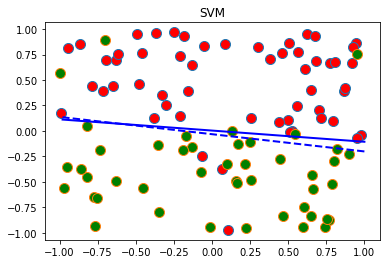

In [60]:
from svmSlack import svmSlack

nRep = 1 # number of replicates
nTrain = 100 # number of training data
nTest = 100
sum_E_train = 0
sum_E_test = 0
sum_Num = 0
def getSVM(X, y, w):
    X2 = np.vstack((np.ones((1, X.shape[1])), X))
    return np.sum(y != np.sign(np.matmul(X2.T, w).T)) / X.shape[1]

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:,:nTrain] 
    X_test = X[:,nTrain:]
    Y_train = y[:,:nTrain] 
    Y_test = y[:, nTrain:]
    w_g, num_sc = svmSlack(X_train, Y_train)
    # Compute training, testing error
    sum_E_train = sum_E_train + getSVM(X_train, Y_train, w_g)
    sum_E_test = sum_E_test + getSVM(X_test, Y_test, w_g)
    sum_Num = sum_Num + num_sc
    # Sum up number of support vectors

E_train = sum_E_train / nRep
E_test = sum_E_test / nRep
avgNum = sum_Num / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X_test, Y_test, w_f, w_g, 'SVM')